In [1]:
from PIL import Image
import matplotlib.pyplot as plt

from diffae import DiffusionAutoEncodersInterface

In [2]:
args = {
    'output': '../output/celebahq128',
    'model_ckpt': 'last_ckpt.pth',
}
mode = 'infer'
diffae = DiffusionAutoEncodersInterface(args, mode)

2022-12-17 17:14:27.209 | INFO     | diffae.interface:_init_config:69 - Initializing config...
2022-12-17 17:14:27.357 | INFO     | diffae.interface:_init_model:103 - Initializing Diffusion Autoencoders...
2022-12-17 17:14:29.248 | INFO     | diffae.interface:_init_model:106 - Loading Diff-AE checkpoint...
2022-12-17 17:14:45.193 | INFO     | diffae.interface:_init_clf_model:114 - Initializing classifier...
2022-12-17 17:14:47.635 | INFO     | diffae.interface:_init_dataset:126 - Initializing dataset...


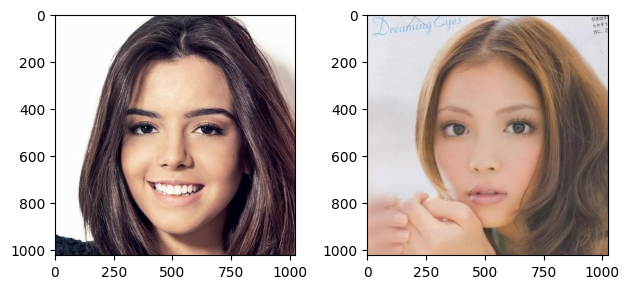

In [3]:
image_1 = Image.open('../assets/celebahq_sample/21576.jpg')
image_2 = Image.open('../assets/celebahq_sample/29998.jpg')

fig, ax = plt.subplots(1, 2, tight_layout=True)
ax[0].imshow(image_1)
ax[1].imshow(image_2)
fig.show()

decoding...: 100%|██████████| 1000/1000 [00:56<00:00, 17.81it/s]


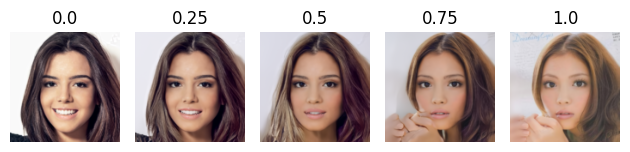

In [4]:
alphas = [0.0, 0.25, 0.50, 0.75, 1.0]
results = diffae.infer_interpolate(image_1, image_2, alphas=alphas)

fig, ax = plt.subplots(1, len(alphas), tight_layout=True)
for i, r in enumerate(results):
    ax[i].imshow(r['output'])
    ax[i].set_title(alphas[i])
    ax[i].axis('off')
fig.show()